In [42]:
# Import modules
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from tqdm.notebook import tqdm
import warnings 
from keras.layers import Dense, Dropout, Convolution2D, Flatten, MaxPooling2D


In [43]:
warnings.filterwarnings("ignore") # Ignore warnings

In [44]:

TRAIN_DIR = 'Facial-Expression-dataset/test'
TEST_DIR = 'Facial-Expression-dataset/test'


In [45]:
# load the dataset

def load_dataset(directory):
    image_paths = []
    labels = []
    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)  
        if os.path.isdir(label_path):  # check it's a folder
            for filename in os.listdir(label_path):
                image_path = os.path.join(label_path, filename)
                image_paths.append(image_path)
                labels.append(label)
            print(label, "completed")
    return image_paths, labels  

In [46]:
# convert to dataframe
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)
# shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
# convert labels to categorical
train['label'] = pd.Categorical(train['label'])
train.head()

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


,image,label
0,Facial-Expression-dataset/test\fear\PrivateTes...,fear
1,Facial-Expression-dataset/test\fear\PrivateTes...,fear
2,Facial-Expression-dataset/test\angry\PublicTes...,angry
3,Facial-Expression-dataset/test\happy\PublicTes...,happy
4,Facial-Expression-dataset/test\surprise\Privat...,surprise


In [47]:
# convert to dataframe
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR)
test.head()

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


,image,label
0,Facial-Expression-dataset/test\angry\PrivateTe...,angry
1,Facial-Expression-dataset/test\angry\PrivateTe...,angry
2,Facial-Expression-dataset/test\angry\PrivateTe...,angry
3,Facial-Expression-dataset/test\angry\PrivateTe...,angry
4,Facial-Expression-dataset/test\angry\PrivateTe...,angry


<Axes: xlabel='label', ylabel='count'>

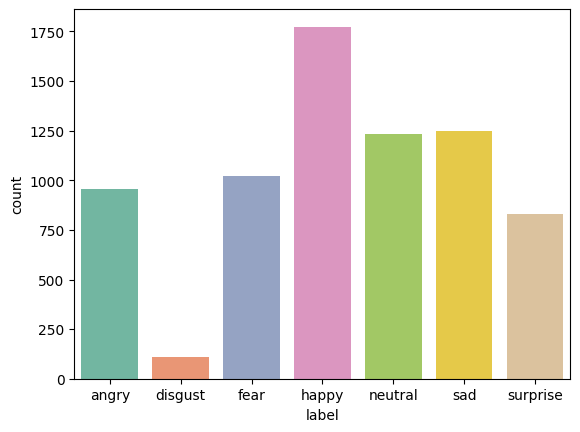

In [48]:
sns.countplot(x='label', data=train, palette='Set2')